## <center>AutoEncoders for Dimensionality Reduction</center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2, # clusters
    cluster_std=1.0,
    random_state=101
    )

X,y = data

In [3]:
X

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645],
       [-10.81648852,  -5.82372891],
       [  0.96977807,   0.50825184],
       [-10.29728144,  -7.21832357],
       [  0.04271579,   3.50389089],
       [  0.15391601,   2.19349145],
       [ -9.81008003,  -5.35480445],
       [-11.18334003,  -6.7004804 ],
       [  0.51876688,   3.39210906],
       [ -8.09111654,  -6.92631627],
       [  1.1112886 ,   0.704398  ],
       [ -7.49469451,  -7.06186612],
       [ -0.75249891,   2.31574949],
       [  0.72046137,   1.63484242],
       [ -0.80867204,   1.41371822],
       [  1.13010192,  -0.25418504],
       [-10.6252148 ,  -6.71479817],
       [ -0.06311641,   3.15682868],
       [  0.56609951,   3.41000402],
       [ -9.10474956,  -7.83047821],
       [-11.33926304,  -7.83622233],
       [  0.29639341,   2.06317757],
       [ -0.52722349,   2.95534215],
 

In [4]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [5]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


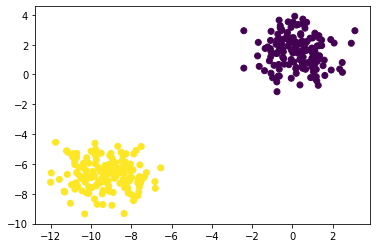

In [7]:
plt.scatter(feat['X1'],feat['X2'],c=y)

Making a 3D scatter, taking the extra noise into account

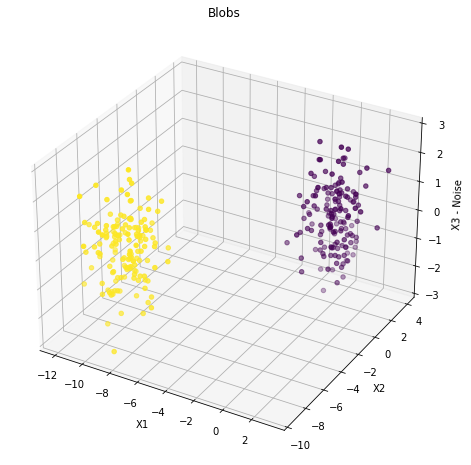

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3 - Noise")
ax.set_title("Blobs");

### Encoder and Decoder

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # SGD commonly used in Autoencoders

In this case we want to build a Neural Network as follows:

$$3 \to 2 \to 3$$

So in this case, the Neural Network encodes from 3 to 2 and decodes form 2 to 3.

In [10]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,
                  activation='relu',
                  input_shape=[3]))

In [11]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,
                  activation='relu',
                  input_shape=[2]))

In [12]:
# AUTOENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))

In [13]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [14]:
autoencoder.fit(scaled_data,scaled_data,epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 889us/step - loss: 0.2639
Epoch 2/10
10/10 [==============================] - 0s 889us/step - loss: 0.2329
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2204
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2192
Epoch 6/10
10/10 [==============================] - 0s 889us/step - loss: 0.2178
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2176
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2183
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2175
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2168


In [15]:
encoded_2dim = encoder.predict(scaled_data) # Dimension reduction, use only encoder
encoded_2dim

10/10 [==============================] - 0s 889us/step


array([[0.0000000e+00, 0.0000000e+00],
       [1.0683336e+00, 0.0000000e+00],
       [9.8387468e-01, 0.0000000e+00],
       [1.7811030e-02, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0167866e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [9.5186198e-01, 0.0000000e+00],
       [1.0070111e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0516639e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0323027e+00, 0.0000000e+00],
       [8.4376186e-02, 0.0000000e+00],
       [9.0607607e-01, 0.0000000e+00],
       [1.0833745e+00, 0.0000000e+00],
       [9.4376099e-01, 0.0000000e+00],
       [1.0565010e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0271958e+00, 0.0000000e+00],
       [1.0095835e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0099750e+00, 0.

In [16]:
encoded_2dim.shape

(300, 2)

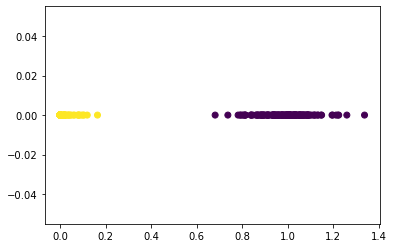

In [17]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)

In this case the 2 clases were correctly separated and the division between classes is clear.